#隨機森林

決策樹演算法中，當模型的樹最大深度設定太大的話容易讓模型過擬合。因此隨機森林藉由多棵不同樹的概念所組成，讓結果比較不容易過度擬合，並使得預測能力更提升。

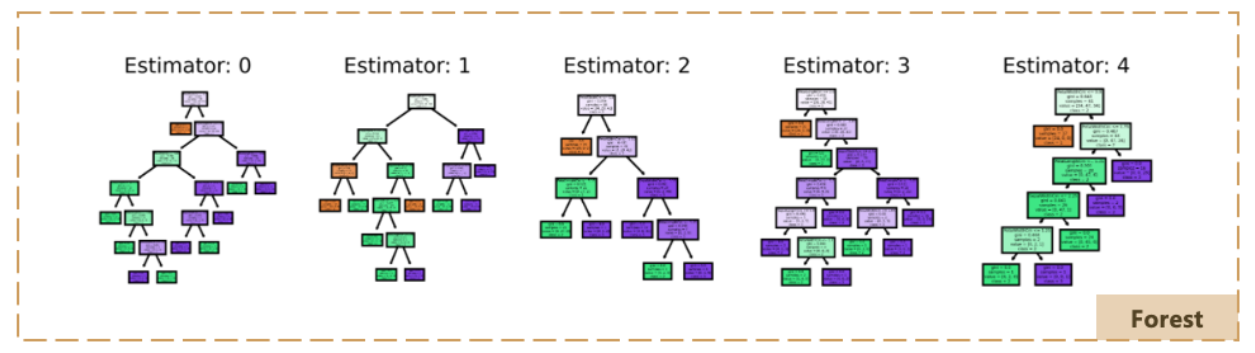

##隨機森林的生成方法

1.   從訓練集中抽取 n’ 筆資料出來清單項目
2.   n’ 筆資料隨機挑選 k 個特徵做樣本
3.   重複 m 次，產生 m 棵決策樹
4.   多數投票機制進行預測





##Parameters:



*   n_estimators: 森林中樹木的數量，預設=100。

*   max_features: 劃分時考慮的最大特徵數，預設auto。

*   criterion: 亂度的評估標準，gini/entropy。預設為gini。

*   max_depth: 樹的最大深度。

*   splitter: 特徵劃分點選擇標準，best/random。預設為best。

*   random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。

*   min_samples_split: 至少有多少資料才能再分


*   min_samples_leaf: 分完至少有多少資料才能分清單項目

##隨機森林的實作

鳶尾花分類

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
clf = RandomForestClassifier(n_estimators=100,criterion="entropy")

In [4]:
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [5]:
clf.score(X_test,y_test)

0.868421052631579

In [6]:
print(clf.feature_importances_)

[0.08370973 0.01867912 0.46756266 0.43004849]


In [7]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.5, 0.9166666666666666, 'petal length (cm) <= 2.6\nentropy = 1.584\nsamples = 71\nvalue = [37, 36, 39]\nclass = virginica'),
 Text(0.3333333333333333, 0.75, 'entropy = 0.0\nsamples = 21\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(0.6666666666666666, 0.75, 'petal width (cm) <= 1.65\nentropy = 0.999\nsamples = 50\nvalue = [0, 36, 39]\nclass = virginica'),
 Text(0.5, 0.5833333333333334, 'sepal length (cm) <= 7.1\nentropy = 0.469\nsamples = 28\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(0.3333333333333333, 0.4166666666666667, 'petal length (cm) <= 4.9\nentropy = 0.391\nsamples = 27\nvalue = [0, 36, 3]\nclass = versicolor'),
 Text(0.16666666666666666, 0.25, 'entropy = 0.0\nsamples = 24\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(0.5, 0.25, 'petal width (cm) <= 1.55\nentropy = 0.811\nsamples = 3\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.3333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.6666666666666666

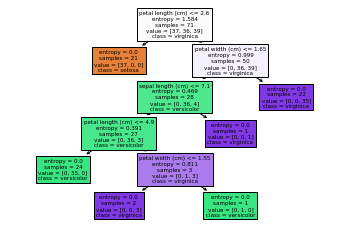

In [8]:
tree.plot_tree(clf.estimators_[0],feature_names=iris.feature_names, class_names=iris.target_names,filled=True)